<a href="https://colab.research.google.com/github/Beytullah-1001/Deep-Learning-Fundamentals/blob/main/Linear_Model_With_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import matplotlib.pyplot as plt


Text(0, 0.5, 'Y')

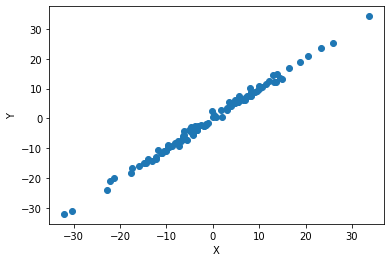

In [2]:
X=torch.randn(100,1)*10
y=X+torch.randn(100,1)#We're adding some noise our data by adding somde radom values
plt.plot(X.numpy(),y.numpy(),'o')
plt.xlabel("X")
plt.ylabel("Y")

In [3]:
#y=wx+b
w=torch.tensor(3.0,requires_grad=True)
b=torch.tensor(1.0,requires_grad=True)



In [4]:
def forward(x):
  y=w*x+b
  return y

In [5]:
X=torch.tensor(5)
forward(X)

tensor(16., grad_fn=<AddBackward0>)

In [6]:
X=torch.tensor([[5],[7]])
forward(X)

tensor([[16.],
        [22.]], grad_fn=<AddBackward0>)

In [7]:
from torch.nn import Linear

In [8]:
torch.manual_seed(1)
model=Linear(in_features=1,out_features=1)
print(model.bias,model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [9]:
x=torch.tensor([[0.5],[1.0],[3.2]])
prediction=model(x)
prediction

tensor([[-0.1837],
        [ 0.0739],
        [ 1.2075]], grad_fn=<AddmmBackward0>)

## Creating Custom Modules

In [10]:
import torch.nn as nn
class LM(nn.Module):#Our linear model class extends from nn
  def __init__(self,input_size,output_size):#Constructor for our LM class
    super().__init__ ()
    self.linear=nn.Linear(input_size,output_size)
  def forward(self,x):
    preds=self.linear(x)
    return preds



In [11]:
X=torch.tensor([4.0])
torch.manual_seed(1)
my_linear_model=LM(1,1)
print("-------------Weights and biases--------------------")
print(list(my_linear_model.parameters()))
print("-------------Prediction----------------------------")
print(my_linear_model.forward(X))
#We can see that our bias and weight

-------------Weights and biases--------------------
[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]
-------------Prediction----------------------------
tensor([1.6197], grad_fn=<AddBackward0>)


In [12]:
[w,b]=my_linear_model.parameters()
print(w)
print(b)
#def get_parameters():
 # return my_linear_model.


Parameter containing:
tensor([[0.5153]], requires_grad=True)
Parameter containing:
tensor([-0.4414], requires_grad=True)


In [13]:

def get_parameters():
  return (w[0][0].item(),b[0].item())  

In [14]:
import numpy as np
X=torch.randn(100,1)*10
y=X+torch.randn(100,1)#We're adding some noise our data by adding somde radom values

In [15]:
def plot_fit(title):
  plt.title(title)
  w1,b1=get_parameters()
  x1=np.array([-30,30])
  y1=w1*x1+b1
  plt.plot(x1,y1,'r')
  plt.scatter(X.numpy(),y.numpy())
  plt.show()

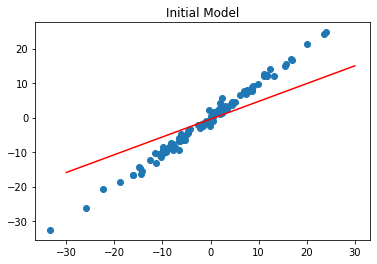

In [16]:
plot_fit("Initial Model")

As we can see above the red line is not the best fitted line to our data points. Therefore we should use gradient descent to adjust our weighs

## Training Model

In [17]:
criterion=nn.MSELoss()#Our loss function. For now we will use Mean Squared Error Loss Function 
optimizer=torch.optim.SGD(my_linear_model.parameters(),lr=0.01)#We'll use Stochastic Gradient Descent to train our model

In [18]:
epochs=100
losses=[]#We create losses list to save our loss values at the end of each epoch 

In [28]:
for i in range(epochs):
  y_pred=my_linear_model.forward(X)
  loss=criterion(y_pred,y)#Calculate loss for each iteration
  print("Epoch:",i, " loss:",loss.item())
  losses.append(loss)

  loss.backward()
  optimizer.step()


Epoch: 0  loss: 21.578208923339844
Epoch: 1  loss: 38.411720275878906
Epoch: 2  loss: 15.188231468200684
Epoch: 3  loss: 44.421714782714844
Epoch: 4  loss: 9.609909057617188
Epoch: 5  loss: 49.38129806518555
Epoch: 6  loss: 5.205082416534424
Epoch: 7  loss: 52.983158111572266
Epoch: 8  loss: 2.2656400203704834
Epoch: 9  loss: 55.00985336303711
Epoch: 10  loss: 0.9916938543319702
Epoch: 11  loss: 55.34410095214844
Epoch: 12  loss: 1.4748218059539795
Epoch: 13  loss: 53.972503662109375
Epoch: 14  loss: 3.6891095638275146
Epoch: 15  loss: 50.98399353027344
Epoch: 16  loss: 7.491288661956787
Epoch: 17  loss: 46.563743591308594
Epoch: 18  loss: 12.630523681640625
Epoch: 19  loss: 40.98301696777344
Epoch: 20  loss: 18.76697540283203
Epoch: 21  loss: 34.58502960205078
Epoch: 22  loss: 25.49712371826172
Epoch: 23  loss: 27.767074584960938
Epoch: 24  loss: 32.38326644897461
Epoch: 25  loss: 20.95842742919922
Epoch: 26  loss: 38.98408889770508
Epoch: 27  loss: 14.594603538513184
Epoch: 28  loss:

RuntimeError: ignored

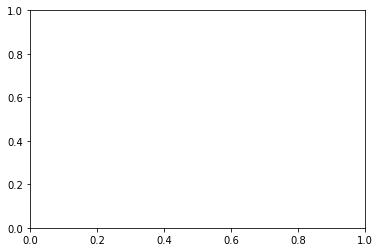